# Punto 5.10
Punto(a)

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
data = pd.read_csv('Carseats.csv')

# Preparar datos (creando dummies para variables categóricas)
def prepare_data(df):
    # Crear variables dummy para Urban, US, y ShelveLoc
    df_processed = pd.get_dummies(df, columns=['Urban', 'US', 'ShelveLoc'], drop_first=True)
    
    # Seleccionar las variables predictoras
    X = df_processed[['Price', 'Income', 'Advertising', 'Age', 'Education', 'Urban_Yes', 'US_Yes', 'ShelveLoc_Good', 'ShelveLoc_Medium']]
    y = df_processed['Sales']
    
    # Convertir las columnas booleanas a enteros
    X = X.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)
    
    return X, y

X, y = prepare_data(data)

# Ajustar el modelo usando statsmodels para obtener estadísticas detalladas
def fit_model(X, y):
    # Agregar una constante para el intercepto
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

# Ajustar el modelo y mostrar el resumen
model = fit_model(X, y)
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     105.8
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           6.29e-99
Time:                        17:52:01   Log-Likelihood:                -735.21
No. Observations:                 400   AIC:                             1490.
Df Residuals:                     390   BIC:                             1530.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.4510      0.699  

Punto (e)

In [9]:
# Seleccionar predictores significativos
X_reduced = X[['Price', 'Income', 'Advertising', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']]

model_reduced = fit_model(X_reduced, y)
print(model_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          1.33e-101
Time:                        18:05:12   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.4006      0.545  

Punto (g)

In [11]:
conf_intervals = model_reduced.conf_int(alpha=0.05)
print(conf_intervals)

                          0          1
const             12.328525  14.472662
Price             -0.067017  -0.054101
Income             0.008103   0.018998
Advertising        0.082776   0.128553
Age               -0.059244  -0.040408
ShelveLoc_Good     4.422920   5.328284
ShelveLoc_Medium   1.632438   2.376694


Punto (h)

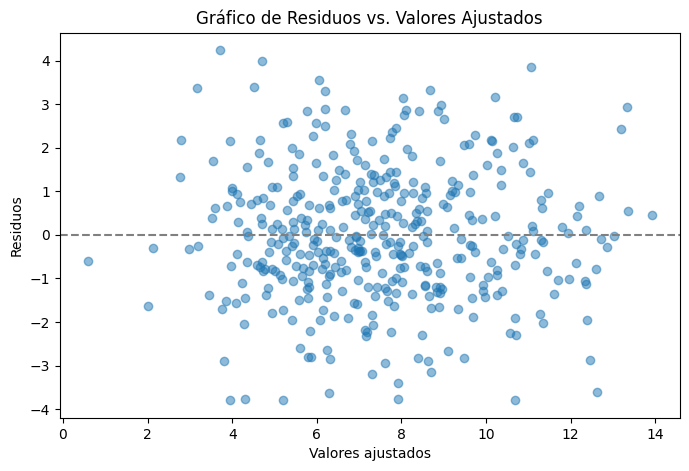

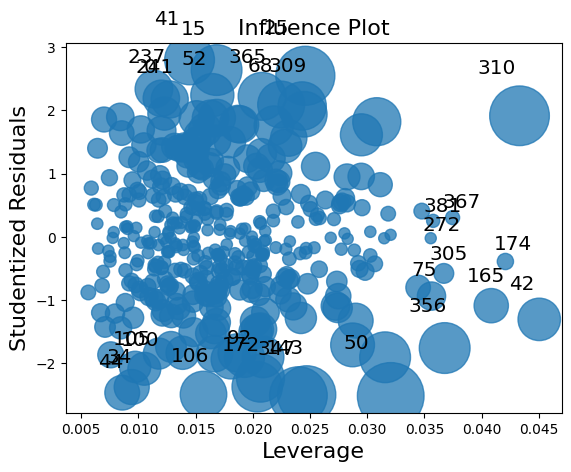

In [12]:

# Gráfico de residuos vs. valores ajustados
def plot_residuals_vs_fitted(model):
    residuals = model.resid
    fitted = model.fittedvalues
    
    plt.figure(figsize=(8, 5))
    plt.scatter(fitted, residuals, alpha=0.5)
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.xlabel("Valores ajustados")
    plt.ylabel("Residuos")
    plt.title("Gráfico de Residuos vs. Valores Ajustados")
    plt.show()

# Gráfico de leverage (influencia) con valores estandarizados
def plot_leverage_resid2(model):
    sm.graphics.influence_plot(model, criterion="cooks")
    plt.show()

# Llamada a las funciones
plot_residuals_vs_fitted(model_reduced)
plot_leverage_resid2(model_reduced)
